In [55]:
import numpy as np
import matplotlib.pyplot as plt

#### Questão 1)

In [56]:
rl_bayesiana = np.genfromtxt("/content/drive/MyDrive/topicos avançados em ML/linear_regression_data.csv", delimiter = ',')

In [57]:
rl_bayesiana.shape

(10, 2)

In [58]:
rl_bayesiana

array([[ 0.39293837,  0.08635962],
       [-0.42772133, -0.64387173],
       [-0.54629709, -0.67498147],
       [ 0.10262954, -0.26289158],
       [ 0.43893794,  0.14317741],
       [-0.15378708, -0.47272884],
       [ 0.9615284 ,  0.1141669 ],
       [ 0.36965948, -0.18032295],
       [-0.0381362 ,  0.01182141],
       [-0.21576496, -0.07986457]])

In [59]:
def media_e_desvio_padrao(dataset, manter_dimensoes=True):
  media = np.mean(dataset, axis=0, keepdims = manter_dimensoes)
  desvio_padrao = np.std(dataset, axis=0, keepdims = manter_dimensoes)

  return media, desvio_padrao

In [60]:
def normalizar(dataset, adicionar_uns = True):
  x_data = dataset[:, :-1]
  y_data = dataset[:, -1]

  x_media, x_desvio_padrao = media_e_desvio_padrao(x_data, manter_dimensoes = False)
  y_media, y_desvio_padrao = media_e_desvio_padrao(y_data, manter_dimensoes = True)

  # normalizando
  x_data = ((x_data - x_media)/x_desvio_padrao)
  y_data = ((y_data - y_media)/y_desvio_padrao)

  if adicionar_uns:
    x_data = np.c_[np.ones(x_data.shape[0]), x_data]

  return x_data, x_media, x_desvio_padrao, y_data, y_media, y_desvio_padrao

In [61]:
def normalizar_ponto(ponto, media, desvio_padrao):
  normal = ((ponto - media)/desvio_padrao)

  return normal

In [62]:
def desnormalizar_ponto(ponto, media, desvio_padrao):
  desnormal = ((ponto*desvio_padrao) + media)

  return desnormal

In [63]:
def regressao_linear_bayesiana(x_data, y_data):

  m_inicial = np.zeros(x_data.shape[1])
  S_inicial = 1 * np.eye(x_data.shape[1]) #cov

  m = m_inicial + (np.linalg.inv((S_inicial @ x_data.T @ x_data) + S_inicial) @ S_inicial @ x_data.T @ (y_data - (x_data @ m_inicial)))
  S = S_inicial - (np.linalg.inv((S_inicial @ x_data.T @ x_data) + S_inicial) @ S_inicial @ x_data.T @ x_data @ S_inicial)

  return m, S

In [64]:
x_data, x_media, x_desvio_padrao, y_data, y_media, y_desvio_padrao = normalizar(rl_bayesiana)

In [65]:
m, S = regressao_linear_bayesiana(x_data, y_data)

In [66]:
x_plot = np.linspace(np.min(rl_bayesiana[:, 0]) - 1/2, np.max(rl_bayesiana[:, 0]) + 1/2, 100)

In [67]:
x_plot_normalizado = np.c_[np.ones(x_plot.shape), normalizar_ponto(x_plot, x_media, x_desvio_padrao)]

In [68]:
x_dt, y_dt = rl_bayesiana[:, 0], rl_bayesiana[:, 1]

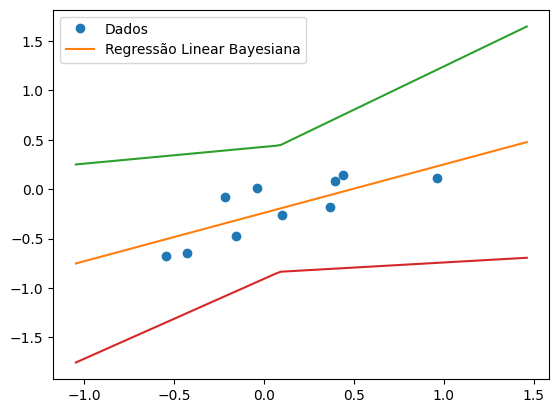

In [69]:
plt.plot(x_dt, y_dt, 'o', label='Dados')
plt.plot(x_plot, desnormalizar_ponto(x_plot_normalizado @ m, y_media, y_desvio_padrao), label='Regressão Linear Bayesiana')
plt.plot(x_plot, desnormalizar_ponto((x_plot_normalizado @ m) + 2*np.diag(np.max(x_plot_normalizado @ S @ x_plot_normalizado.T, axis = 1) + (1 * np.eye(x_plot_normalizado.shape[0]))), y_media, y_desvio_padrao))
plt.plot(x_plot, desnormalizar_ponto((x_plot_normalizado @ m) - 2*np.diag(np.max(x_plot_normalizado @ S @ x_plot_normalizado.T, axis = 1) + (1 * np.eye(x_plot_normalizado.shape[0]))), y_media, y_desvio_padrao))
plt.legend()
plt.show()

#### Questão 2)

In [70]:
rp_bayesiana = np.genfromtxt("/content/drive/MyDrive/topicos avançados em ML/polynomial_regression_data.csv", delimiter = ',')

In [71]:
rp_bayesiana.shape

(10, 2)

In [72]:
rp_bayesiana

array([[ 0.69646919, -0.85127084],
       [ 0.28613933,  0.91086408],
       [ 0.22685145,  0.93973061],
       [ 0.55131477, -0.32379794],
       [ 0.71946897, -0.87245127],
       [ 0.42310646,  0.41777597],
       [ 0.9807642 , -0.15307814],
       [ 0.68482974, -0.94913411],
       [ 0.4809319 ,  0.28104869],
       [ 0.39211752,  0.7872413 ]])

In [73]:
grau_polinomio = 5

def polinomial(dataset):
  x_polinomial = dataset[:, [0]]
  y_polinomial = dataset[:, [1]]

  for i in range(1, grau_polinomio):
    x_polinomial = np.c_[x_polinomial, x_polinomial[:, 0] **(i+1)]

  poli = np.c_[x_polinomial, y_polinomial]
  return poli

In [74]:
poli = polinomial(rp_bayesiana)
x_poli, x_media_poli, x_desvio_padrao_poli, y_poli, y_media_poli, y_desvio_padrao_poli = normalizar(poli)
m2, S2 = regressao_linear_bayesiana(x_poli, y_poli)

In [75]:
x_plot_poli = np.linspace(np.min(rp_bayesiana[:, 0]) - 1/4, np.max(rp_bayesiana[:, 0]) + 1/4, 100)
x_plot_copia_poli = np.copy(x_plot_poli)

In [76]:
for j in range (1, grau_polinomio):
  x_plot_copia_poli = np.c_[x_plot_copia_poli, x_plot_poli**(j+1)]

x_plot_copia_poli = np.c_[np.ones(x_plot_poli.shape), normalizar_ponto(x_plot_copia_poli, x_media_poli, x_desvio_padrao_poli)]

In [77]:
x_dtp, y_dtp = rp_bayesiana[:, 0], rp_bayesiana[:, 1]

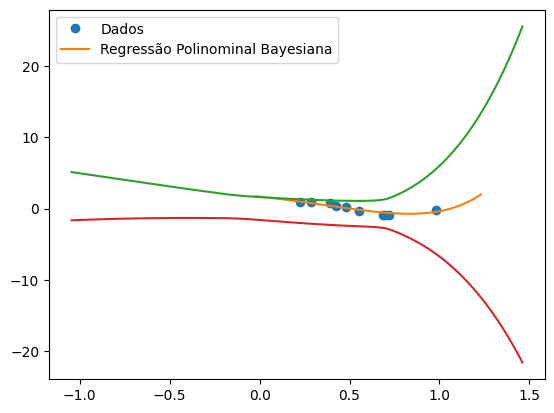

In [78]:
plt.plot(x_dtp, y_dtp, 'o', label='Dados')
plt.plot(x_plot_poli, desnormalizar_ponto(x_plot_copia_poli @ m2, y_media_poli, y_desvio_padrao_poli), label='Regressão Polinominal Bayesiana')
plt.plot(x_plot, desnormalizar_ponto((x_plot_copia_poli @ m2) + 2*np.diag(np.max(x_plot_copia_poli @ S2 @ x_plot_copia_poli.T, axis = 1) + (1 * np.eye(x_plot_copia_poli.shape[0]))), y_media_poli, y_desvio_padrao_poli))
plt.plot(x_plot, desnormalizar_ponto((x_plot_copia_poli @ m2) - 2*np.diag(np.max(x_plot_copia_poli @ S2 @ x_plot_copia_poli.T, axis = 1) + (1 * np.eye(x_plot_copia_poli.shape[0]))), y_media_poli, y_desvio_padrao_poli))
plt.legend()
plt.show()